## Embodied Cognition on Wikipedia: Page views Analysis

In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
df = pd.read_csv('/Users/johnmadrid/Local/data/wiki_embodied_cognition.csv', delimiter=",", header=0, index_col=False)

# Converting date to a datestamp type
df["DateTime"] = pd.to_datetime(df["DateTime"])

# # Check for missing values
print(df.isnull().sum())

# Setting DateTime as index
df = df.set_index("DateTime")
# df.index

DateTime                  0
Embodied cognition[en]    0
Cognitive science[en]     0
Cognition[en]             0
dtype: int64


In [324]:
df

,Embodied cognition[en],Cognitive science[en],Cognition[en]
DateTime,,,
2008-01-01,12,426,612
2008-01-02,4,600,1147
2008-01-03,4,641,1256
2008-01-04,14,627,1197
2008-01-05,7,521,864
...,...,...,...
2022-03-13,156,224,395
2022-03-14,196,318,561
2022-03-15,186,293,574


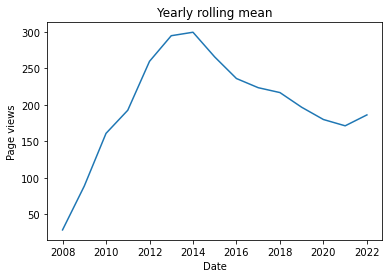

In [95]:
# select the month
df_month = df.index.month
df_year = df.index.year
# Moving averages per year (52 weeks window)
df_mean = df['Embodied cognition[en]'].groupby(df_year).mean()

ax = df_mean.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("Yearly rolling mean")

plt.show()

In [338]:
views_before_project = df['2020-03-01':'2021-02-28']
views_during_project = df['2021-03-01':'2022-02-28']


views_average_1 = df['2008-01-01':'2020-03-01']
views_average_1_month = views_average_1.index.month


views_average_1 = views_average_1['Embodied cognition[en]'].groupby(views_average_1_month).mean()

# views_during_project
views_before_project_month = views_before_project.index.month
views_during_project_month = views_during_project.index.month

views_average_1
# views_during_project.tail(50)
#

DateTime
1     200.875931
2     224.709239
3     227.876676
4     234.469444
5     213.661290
6     172.911111
7     146.502688
8     150.236559
9     195.669444
10    241.295699
11    245.041667
12    209.336022
Name: Embodied cognition[en], dtype: float64

In [347]:
views_during_project_mean = views_during_project['Embodied cognition[en]'].groupby(views_during_project_month).mean()
views_before_project_mean = views_before_project['Embodied cognition[en]'].groupby(views_before_project_month).mean()
views_cogsci_project_mean = views_during_project['Cognitive science[en]'].groupby(views_during_project_month).sum()

mean_view_average_before = views_before_project_mean / views_average_1
mean_view_average_after = views_during_project_mean / views_average_1

# Without normalizing
mean_view = pd.DataFrame()
mean_view['Before'] = pd.DataFrame(views_before_project_mean)
mean_view['After'] = pd.DataFrame(views_during_project_mean)
# mean_view['CogSci'] = pd.DataFrame(views_cogsci_project_mean)
# mean_view
# mean_view.describe()

# Normalizing the data
mean_view_averaged = pd.DataFrame()
mean_view_averaged['Before'] = pd.DataFrame(mean_view_average_before)
mean_view_averaged['After'] = pd.DataFrame(mean_view_average_after)

mean_view_averaged.describe()

,Before,After
count,12.000000,12.000000
mean,0.867211,0.845906
std,0.061915,0.050249
min,0.761748,0.758592
25%,0.836377,0.806702
50%,0.858352,0.853386
75%,0.898023,0.881128
max,1.011361,0.922303


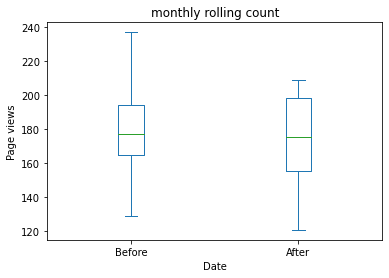

In [350]:
# fig, ax  = plt.subplots()

ax = mean_view.plot(kind='box')
# ax = mean_view.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("monthly rolling count")

plt.show()

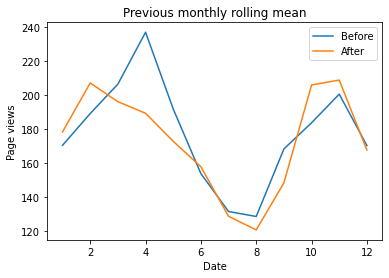

In [352]:
views_before_project_mean = views_before_project['Embodied cognition[en]'].groupby(views_before_project_month)

ax = mean_view.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("Previous monthly rolling mean")

plt.show()